In [1]:
!pip install yfinance;

In [2]:
import yfinance as yf
ticker='AAPL'
df=yf.download(ticker,start='2020-01-01', end='2024-12-3')

C:\Users\User\AppData\Local\Temp\ipykernel_24772\2414304370.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(ticker,start='2020-01-01', end='2024-12-3')
[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620834,72.681281,71.373211,71.627084,135480400
2020-01-03,71.914810,72.676439,71.689950,71.847110,146322800
2020-01-06,72.487846,72.526533,70.783248,71.034709,118387200
2020-01-07,72.146950,72.753831,71.926922,72.497537,108872000
2020-01-08,73.307526,73.609760,71.849548,71.849548,132079200


In [4]:
df=df.reset_index()
df.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]

In [5]:
df['Tomorrow_Close'] = df['Close'].shift(-1)
df = df.dropna(subset=['Tomorrow_Close'])

df['Target'] = (df['Tomorrow_Close'] > df['Close']).astype(int)

df['Return_1D'] = df['Close'].pct_change()
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA10'] = df['Close'].rolling(window=10).mean()
df['Volatility_5D'] = df['Return_1D'].rolling(window=5).std()

In [6]:
#To check the columns on how its printed

#print(df.columns)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#classifying features and target 
features=['Return_1D','MA5','MA10','Volatility_5D']
df=df.dropna(subset=features)
X=df[features]
y=df['Target']

#train/test the split
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.2,shuffle=False)

#Train the logistic regression model
model=LogisticRegression()
model.fit(X_train,y_train)
import joblib
joblib.dump(model, "logistic_model.pkl")

#predict and evaluate 
y_pred=model.predict(X_test)

print('Accuracy Score',accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy Score 0.48370672097759676
Confusion Matrix:
 [[374  91]
 [416 101]]
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.80      0.60       465
           1       0.53      0.20      0.28       517

    accuracy                           0.48       982
   macro avg       0.50      0.50      0.44       982
weighted avg       0.50      0.48      0.43       982



In [ ]:
import os
st.write("Current working directory:", os.getcwd())


In [9]:
print(df.shape)


(1228, 12)


In [10]:
import xgboost as xgb
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split


features=['Return_1D','MA5','MA10','Volatility_5D']
df=df.dropna(subset=features)
#classfying the features and target
y=df['Target']
X=df[features]

#train test split
X_test,X_train,y_test,y_train=train_test_split(X,y,shuffle=False,test_size=0.2)

#train the model,xgboost classifier
xgb_clf=xgb.XGBClassifier(use_label_encoder=False,eval_metric='logloss')
xgb_clf.fit(X_train,y_train)

y_predict=xgb_clf.predict(X_test)

print('Accuracy_Score',accuracy_score(y_test,y_predict))
print('Confusion_Matrix:\n',confusion_matrix(y_test,y_predict))
print('Classification Report:\n',classification_report(y_test,y_predict))



Accuracy_Score 0.5183299389002036
Confusion_Matrix:
 [[153 312]
 [161 356]]
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.33      0.39       465
           1       0.53      0.69      0.60       517

    accuracy                           0.52       982
   macro avg       0.51      0.51      0.50       982
weighted avg       0.51      0.52      0.50       982



C:\Anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:15:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


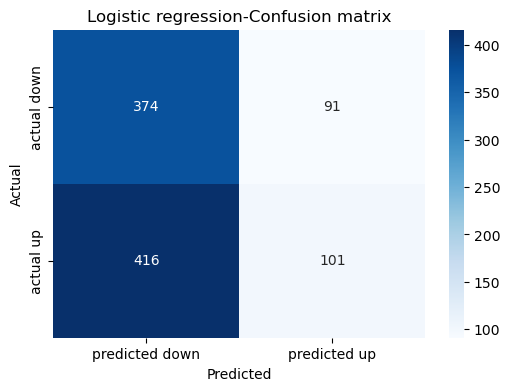

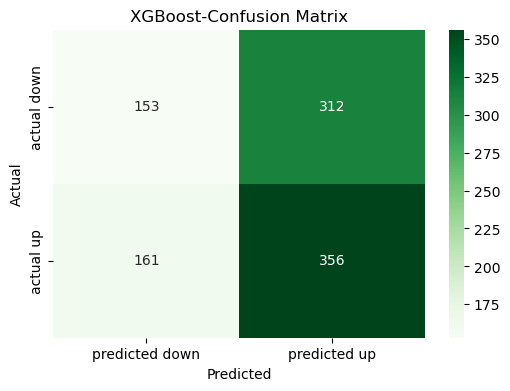

In [11]:
#plotting a graph to compare the XGBoost vs Logistic regression model

import matplotlib.pyplot as plt
import seaborn as sns

#confusion matrix for logistic regression
cm_log = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm_log,annot=True,fmt='d',cmap='Blues',
            xticklabels=['predicted down','predicted up'],yticklabels=['actual down','actual up'])
plt.title('Logistic regression-Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

cm_xgb=confusion_matrix(y_test,y_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb,annot=True,fmt='d',cmap='Greens',
             xticklabels=['predicted down','predicted up'],yticklabels=['actual down','actual up'])
plt.title('XGBoost-Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



            
            

In [12]:
#adding in histgradientboosting classifier

from sklearn.ensemble import HistGradientBoostingClassifier
model_hgbc=HistGradientBoostingClassifier()
model_hgbc.fit(X_train,y_train)

#predict and evaluate
y_predict_hgbc=model_hgbc.predict(X_test)
print('Accuracy Score',accuracy_score(y_test,y_predict_hgbc))
print('Confusion matrix:\n',confusion_matrix(y_test,y_predict_hgbc))
print('Classification report:\n',classification_report(y_test,y_predict_hgbc))


Accuracy Score 0.5122199592668024
Confusion matrix:
 [[224 241]
 [238 279]]
Classification report:
               precision    recall  f1-score   support

           0       0.48      0.48      0.48       465
           1       0.54      0.54      0.54       517

    accuracy                           0.51       982
   macro avg       0.51      0.51      0.51       982
weighted avg       0.51      0.51      0.51       982



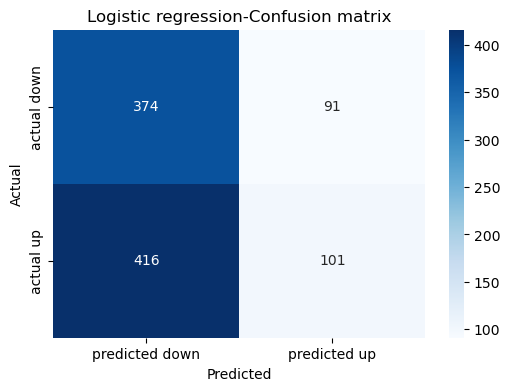

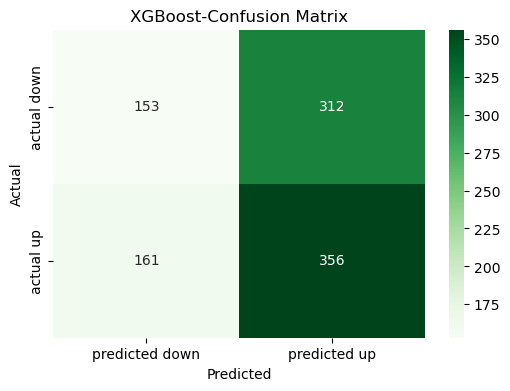

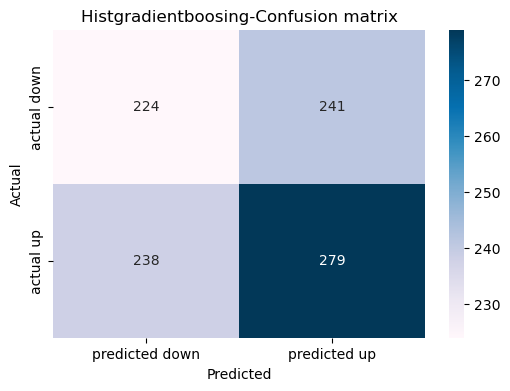

In [13]:
#confusion matrix for logistic regression,xgboost & histgradientboosting classifier
cm_log = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm_log,annot=True,fmt='d',cmap='Blues',
            xticklabels=['predicted down','predicted up'],yticklabels=['actual down','actual up'])
plt.title('Logistic regression-Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

cm_xgb=confusion_matrix(y_test,y_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb,annot=True,fmt='d',cmap='Greens',
             xticklabels=['predicted down','predicted up'],yticklabels=['actual down','actual up'])
plt.title('XGBoost-Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


cm_hgbc=confusion_matrix(y_test,y_predict_hgbc)
plt.figure(figsize=(6,4))
sns.heatmap(cm_hgbc,annot=True,fmt='d',cmap='PuBu',
            xticklabels=['predicted down','predicted up'],yticklabels=['actual down','actual up'])
plt.title('Histgradientboosing-Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [ ]:
import streamlit as st
#import yfinance as yf
import pandas as pd
import numpy as np
#from sklearn.linear_model import LogisticRegression
import joblib
import time

# Load your trained model (or use a placeholder model)
model = joblib.load("logistic_model.pkl")


# Sidebar inputs
st.sidebar.title("📈 Live Stock Predictor")
ticker = st.sidebar.text_input("Enter Stock Symbol:", "AAPL")
interval = st.sidebar.selectbox("Interval", ["1m", "5m", "15m"], index=0)

st.title("🔮 Real-Time Stock Movement Prediction")

# Function to compute features
def compute_features(df):
    df['Return_1D'] = df['Close'].pct_change()
    df['MA5'] = df['Close'].rolling(window=5).mean()
    df['MA10'] = df['Close'].rolling(window=10).mean()
    df['Volatility_5D'] = df['Return_1D'].rolling(window=5).std()
    df = df.dropna()
    return df

# Live update loop
placeholder = st.empty()

while True:
    df = yf.download(ticker, period="1d", interval=interval, progress=False)
    df.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]
    df = compute_features(df)

    if not df.empty:
        latest = df.iloc[-1:][['Return_1D', 'MA5', 'MA10', 'Volatility_5D']]
        latest.columns = [str(col).strip() for col in latest.columns]
        prediction = model.predict(latest)[0]

        with placeholder.container():
            st.subheader(f"📊 {ticker} Current Price: ${df['Close'].iloc[-1]:.2f}")
            st.metric("🔎 Predicted Direction", "📈 UP" if prediction == 1 else "📉 DOWN")
            st.line_chart(df['Close'])

    time.sleep(60)  # Refresh every 60 seconds


2025-06-20 08:15:18.510 
  command:

    streamlit run C:\Anaconda\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-20 08:15:18.513 Session state does not function when running a script without `streamlit run`
C:\Users\User\AppData\Local\Temp\ipykernel_24772\2009674683.py:33: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="1d", interval=interval, progress=False)
C:\Users\User\AppData\Local\Temp\ipykernel_24772\2009674683.py:33: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="1d", interval=interval, progress=False)
C:\Users\User\AppData\Local\Temp\ipykernel_24772\2009674683.py:33: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="1d", interval=interval, progress=False)
C:\Users\User\AppData\Local\Temp\ipykernel_24772\2009674683.py:33: FutureWarning: YF.download() has changed argument au